In [59]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import os

import seaborn as sns
import matplotlib.pyplot as plt

random_state = 3603

In [60]:
data_path_2009 = r'C:\Users\nogag\Documents\birocracy\PTSDClassifier\PTSD\Data\2009'
df_2009 = pd.read_excel(os.path.join(data_path_2009, "PTSD.xlsx"))


In [61]:
data_path_2016 = r'C:\Users\nogag\Documents\birocracy\PTSDClassifier\PTSD\Data\2016'
df_2016 = pd.read_csv(os.path.join(data_path_2016, "IDF_ABM_16.2.15_wide.csv"))




## features in the original data

In [62]:
trans_2016_2009_features = {
    'bagrut': 'highschool_diploma',
 'ADHD': 'ADHD',
  'Accuracy_threat_T1': 'T1Acc1t',
  'Accuracy_NT_T1': 'T1Acc1n',
  'Threat_Bias_T1': 'T1bias',
 'PHQ_T1': 'phq1',
 'Trait_T1': 'trait1',
 'State_T1': 'state1',
 'PCL_T1': 'PCL1',
 'Intrusion_T1':'Intrusion_T1',
    'Avoidance_T1': 'Avoidance_T1',
    'Hyper_T1': 'Hyper_T1',
}


In [63]:
PCL_2009_1 = pd.read_csv(os.path.join(data_path_2009, "questionnaire_PCL1.csv"))

intrusion_features_2009 = ["q6.1_INTRU", "q6.2_DREAM", "q6.3_FLASH", "q6.4_UPSET", "q6.5_PHYS"]
avoidance_features_2009 = ["q6.6_AVTHT", "q6.7_AVSIT", "q6.8_AMNES", "q6.9_DISINT", "q6.10_DTACH",
             "q6.11_NUMB", "q6.12_FUTRE"]
hyper_features_2009 = ["q6.13_SLEEP", "q6.14_ANGER", "q6.15_CONC", "q6.16_HYPER", "q6.17_STRTL"]


df_2009_1 = df_2009.merge(PCL_2009_1[intrusion_features_2009 +avoidance_features_2009+hyper_features_2009+ ["ID"]], on="ID", how='outer')
df_2009['Intrusion_T1'] = df_2009_1[intrusion_features_2009].sum(axis=1)
df_2009['Avoidance_T1'] = df_2009_1[avoidance_features_2009].sum(axis=1)
df_2009['Hyper_T1'] = df_2009_1[hyper_features_2009].sum(axis=1)

trans_2016_2009_features['Intrusion_T1']= 'Intrusion_T1'
trans_2016_2009_features['Avoidance_T1']= 'Avoidance_T1'
trans_2016_2009_features['Hyper_T1']= 'Hyper_T1'

In [64]:
PCL_2009_3 = pd.read_excel(os.path.join(data_path_2009, "questionnaire6PCL3.xlsx"))



PCL_2009_3 = df_2009.merge(PCL_2009_3[intrusion_features_2009 +avoidance_features_2009+hyper_features_2009+ ["ID"]], on="ID", how='outer')
df_2009['Intrusion_T4'] = PCL_2009_3[intrusion_features_2009].sum(axis=1)
df_2009['Avoidance_T4'] = PCL_2009_3[avoidance_features_2009].sum(axis=1)
df_2009['Hyper_T4'] = PCL_2009_3[hyper_features_2009].sum(axis=1)


## target feature

In [65]:
target_feature = 'target_feature'
secondary_targets = ['Intrusion_T4', 'Avoidance_T4', 'Hyper_T4']
X_features = [i for i in trans_2016_2009_features.values() if not i == target_feature]

df_2016['target_feature'] = (df_2016['PCL_T4'] > 39).astype(int)
df_2009['target_feature'] = (df_2009['PCL3'] > 39).astype(int)

## adjust features from 2016

In [66]:
df_2016['bagrut'] = (df_2016['bagrut'] == 'yes').astype(int)
df_2016['dyslexia'] = (df_2016['dyslexia'] == 'yes').astype(int)
df_2016['ADHD'] = (df_2016['ADHD'] == 'yes').astype(int)

In [67]:
df_2016 = df_2016.rename(trans_2016_2009_features, axis=1)

In [68]:

df_2016 = df_2016[~df_2016['Intrusion_T4'].isna()]
df_2016 = df_2016[~df_2016['Avoidance_T4'].isna()]
df_2016 = df_2016[~df_2016['Hyper_T4'].isna()]
df_2016 = df_2016[~df_2016['PCL_T4'].isna()]


df_2009 = df_2009[~df_2009['Intrusion_T4'].isna()]
df_2009 = df_2009[~df_2009['Avoidance_T4'].isna()]
df_2009 = df_2009[~df_2009['Hyper_T4'].isna()]
df_2009 = df_2009[~df_2009['PCL3'].isna()]

## plots

In [69]:

df_2016_1 = df_2016[df_2016.Wave=='august12']
df_2016_2 = df_2016[df_2016.Wave=='nov12']
df_2016_3 = df_2016[df_2016.Wave=='august13']
df_2016 = df_2016[~(df_2016['Wave']=='nov12')]


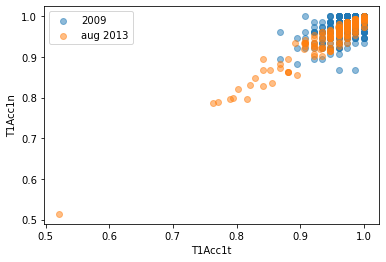

In [70]:
plt.scatter(df_2009['T1Acc1t'].dropna(),df_2009['T1Acc1n'].dropna(), label = '2009', alpha=0.5)

plt.scatter(df_2016_3['T1Acc1t'].dropna(),df_2016_3['T1Acc1n'].dropna(), label = 'aug 2013', alpha=0.5)
plt.xlabel('T1Acc1t')
plt.ylabel('T1Acc1n')
plt.legend()

highschool_diploma


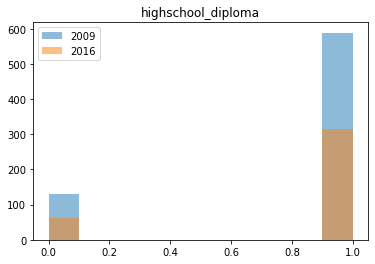

ADHD


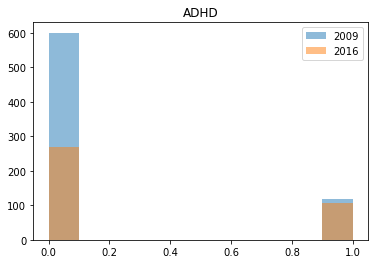

T1Acc1t


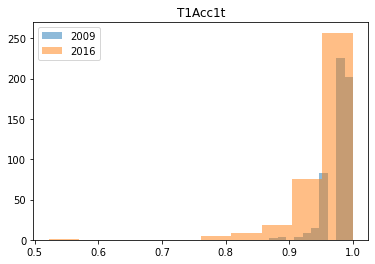

T1Acc1n


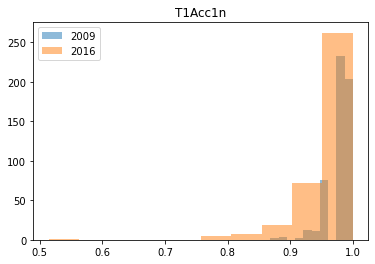

T1bias


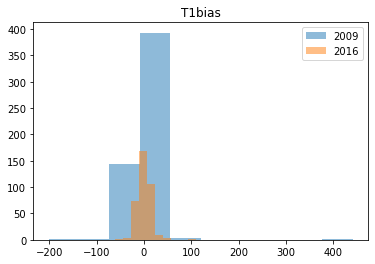

phq1


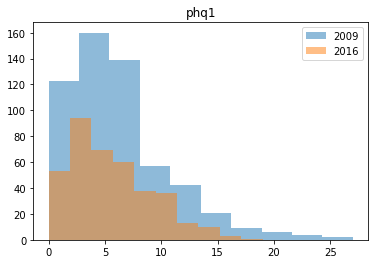

trait1


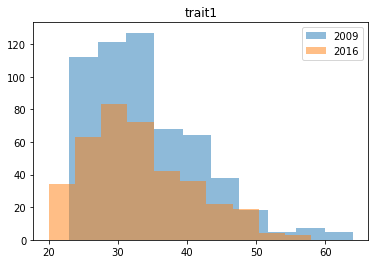

state1


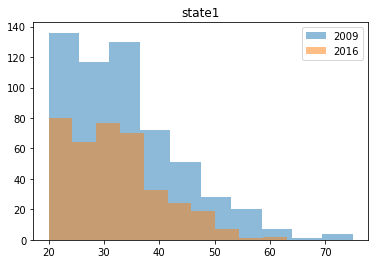

PCL1


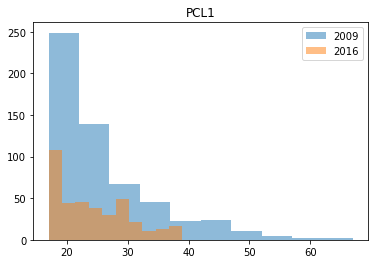

Intrusion_T1


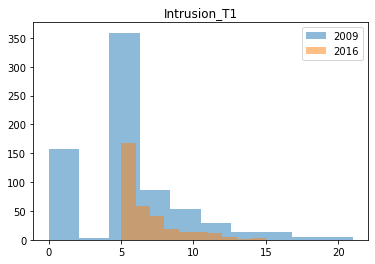

Avoidance_T1


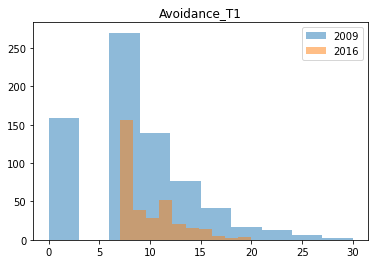

Hyper_T1


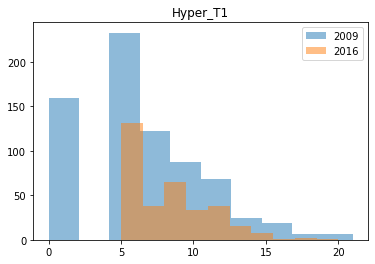

<Figure size 432x288 with 0 Axes>

In [42]:
for i in X_features:
    print(i)
    plt.hist(df_2009[i].dropna(), label = '2009', alpha=0.5)

    plt.hist(df_2016[i].dropna(), label = '2016', alpha=0.5)
    plt.title(i)
    plt.legend()
    plt.show()
    plt.clf()

PCL_T4


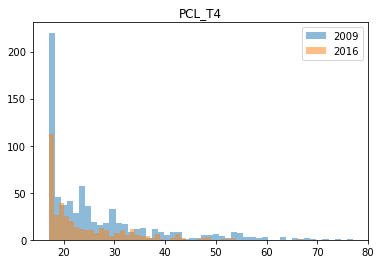

<Figure size 432x288 with 0 Axes>

In [57]:
    print(i)
    plt.hist(df_2009['PCL3'].dropna(), label = '2009', alpha=0.5, bins=50)

    plt.hist(df_2016['PCL_T4'].dropna(), label = '2016', alpha=0.5, bins=50)
    plt.title(i)
    plt.legend()
    plt.show()
    plt.clf()

highschool_diploma


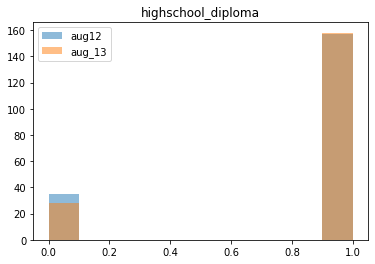

ADHD


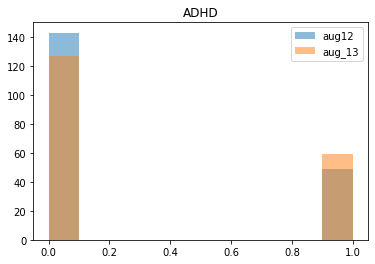

T1Acc1t


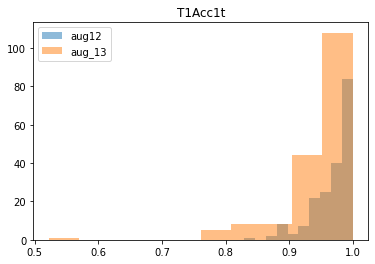

T1Acc1n


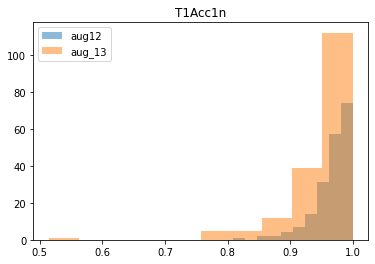

T1bias


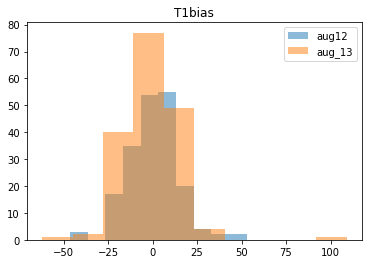

phq1


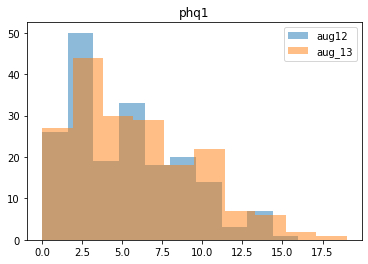

trait1


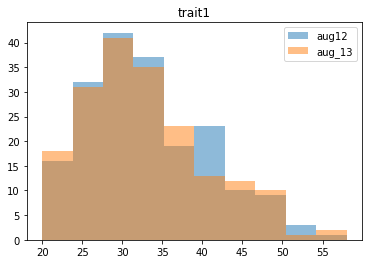

state1


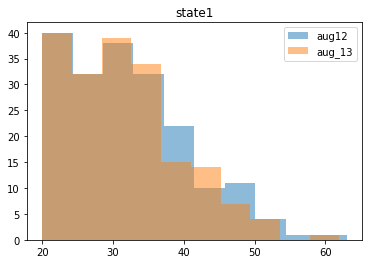

PCL1


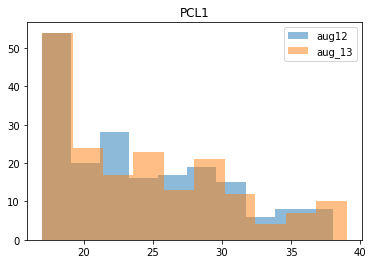

Intrusion_T1


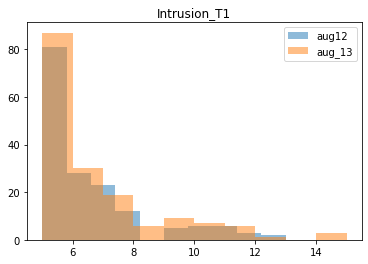

Avoidance_T1


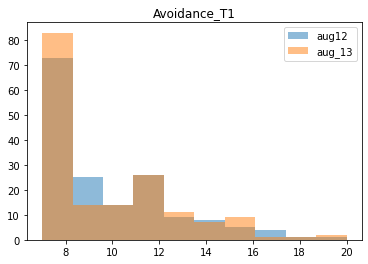

Hyper_T1


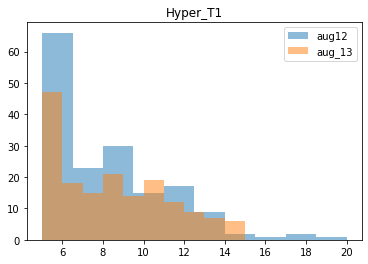

<Figure size 432x288 with 0 Axes>

In [73]:
for i in X_features:
    print(i)
    plt.hist(df_2016_1[i].dropna(), label = 'aug12', alpha=0.5)

    plt.hist(df_2016_3[i].dropna(), label = 'aug_13', alpha=0.5)
    plt.title(i)
    plt.legend()
    plt.show()
    plt.clf()

In [30]:
PCL_2016["ID"].max()

2308.0

In [26]:
df_2016_3

,Unnamed: 0,ID,Group,Wave,Number_train,Drop_Out,Refusal,Makim,age,גדוד,...,T1q2.11,T1q2.12,T1q2.13,T1q2.14,T1q2.15,T1q2.16,T1q2.17,T1q2.18,T1q2.19,T1q2.20
631,501.0,4000.0,train_8,august13,8.0,unable,no,no,19.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,502.0,4002.0,train_4,august13,4.0,no,no,no,19.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,503.0,4003.0,placebo,august13,4.0,no,no,no,19.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,504.0,4004.0,control,august13,0.0,no,no,yes,19.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,505.0,4005.0,train_8,august13,8.0,no,no,no,19.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,719.0,4264.0,control,august13,0.0,phisical,no,no,21.0,890.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,720.0,4265.0,placebo,august13,4.0,unable,no,no,21.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,721.0,4270.0,placebo,august13,0.0,low_military level,no,no,19.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,722.0,4271.0,train_8,august13,8.0,no,no,no,19.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


highschool_diploma


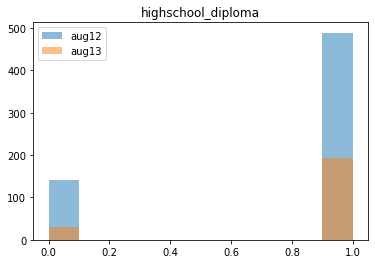

ADHD


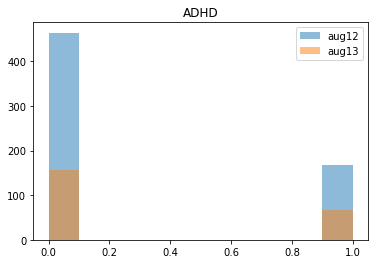

T1Acc1t


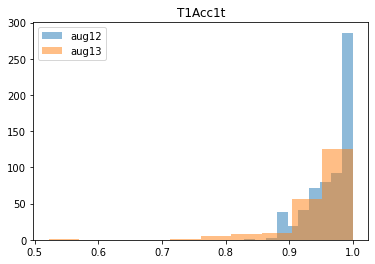

T1Acc1n


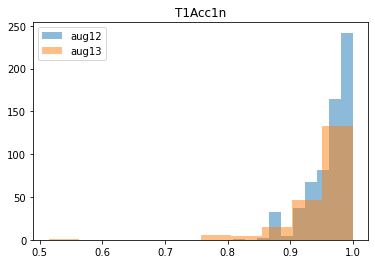

T1bias


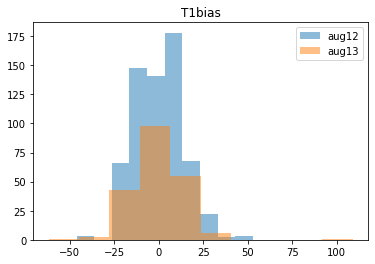

phq1


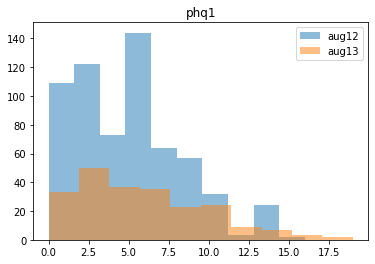

trait1


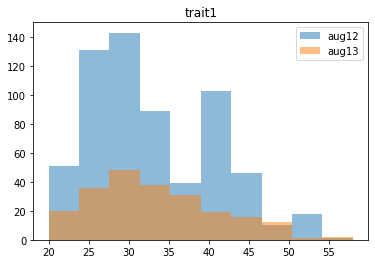

state1


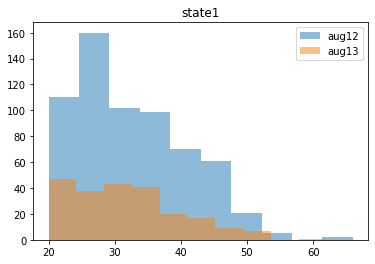

PCL1


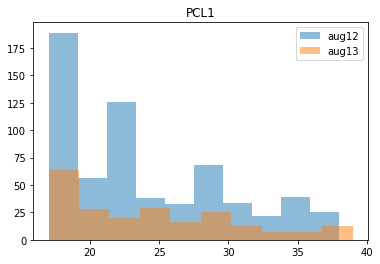

Intrusion_T1


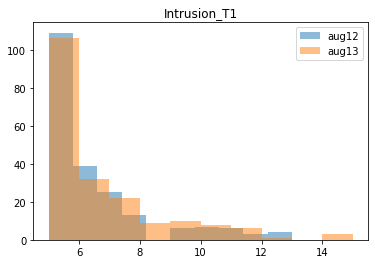

<Figure size 432x288 with 0 Axes>

In [50]:
for i in X_features + ['Intrusion_T1']:
    print(i)
    plt.hist(df_2016_1[i].dropna().astype(float), label = 'aug12', alpha=0.5)
    plt.hist(df_2016_3[i].dropna().astype(float), label = 'aug13', alpha=0.5)
    plt.title(i)
    plt.legend()
    plt.show()
    plt.clf()